# Code for generating plots for Fig. 1

Run this code sequentially cell by cell.

In [1]:
from matplotlib import pyplot as plt
import os

import numpy as np
from mmpyreader import mmpyreader  # this must include img._close() in get_img()
from pycromanager import Bridge

In [3]:
currdir=os.getcwd()

## Fig. 1C. snapshots from randomly selected wells

In [4]:
# open a bridge to Micromanager. Micromanager must be running a server on port 4827
reader = mmpyreader.MMpyreader()
mm=reader.mm
builder = mm.data().getCoordsBuilder()

In [6]:
stack = reader.load_folder(currdir+"\\data_Fig_1\\last_frame",True)
axes = stack._metadata.getOrderedAxes()
print(axes)
axnb = list(stack._mmstore.getNextIndex(ax) for ax in axes)
print(axnb)

60P x 1Z x 1T x 2C
['channel', 'time', 'z', 'position']
[2, 1, 1, 60]


In [11]:
pixelsize=0.416
def get_positions_of_wells(name):
    global pixelsize
    data = np.genfromtxt(name, delimiter=',', skip_header = 1)
    #print(data)
    return (1./pixelsize)*np.reshape(data,(4,4,-1))[:,:,1:3]


def extract_image(pi,ni, ax_array=None,as_array=False,flip_if_required=False):
    imgFL,img_meta = stack.get_img(C=1,P=pi,T=0,Z=0)
    imgBR,img_meta = stack.get_img(C=0,P=pi,T=0,Z=0)
    imgFL=imgFL.astype(float)
    imgFL-=imgFL.min()
    imgFL/=imgFL.max()
    imgBR=imgBR.astype(float)
    imgBR/=imgBR.max()
    
    imgR=0.7*imgBR+0.3*imgFL
    imgG=imgB=0.7*imgBR/(1+2*imgFL)
    
    poss=get_positions_of_wells(currdir+"\\data_Fig_1\\wells_coordinates\\pos"+str(pi+1)+".csv")
    if (pi<30):
        x1,y1=poss[ni,0,0]-20,poss[ni,0,1]-80
        x2,y2=poss[ni,2,0]+20,poss[ni,2,1]+40
    else:
        x1,y1=poss[ni,0,0]-20,poss[ni,0,1]-40
        x2,y2=poss[ni,2,0]+20,poss[ni,2,1]+80        
    img=np.dstack((imgR,imgG,imgB))        
    
    if (as_array):
        return imgBR[int(y1):int(y2),int(x1):int(x2)], imgFL[int(y1):int(y2),int(x1):int(x2)], int(x1), int(y1), int(x2),int(y2)
    if (ax_array==None):
        plt.axis('off')
        if (flip_if_required==True and pi>=30):
            plt.imshow(np.flip(img[int(y1):int(y2),int(x1):int(x2)],axis=0))
        else:
            plt.imshow(img[int(y1):int(y2),int(x1):int(x2)])
    else:
        ax_array.axis('off')
        if (flip_if_required==True and pi>=30):
            ax_array.imshow(np.flip(img[int(y1):int(y2),int(x1):int(x2)],axis=0))
        else:
            ax_array.imshow(img[int(y1):int(y2),int(x1):int(x2)])    

In [12]:
# coordinates of wells with different A and T

file=open(currdir+'\\data_Fig_1\\shape_table2.csv')
print(file.readline())
shapes = np.array([np.array(list(map(int, line.split(',')))) for line in file])
file.close()
print(len(shapes))
print(shapes[-1])
shapesraw=shapes

print("removing wells with problems")
shapes=shapes[shapes[:,4]==0]
print(len(shapes))

T100A20=shapes[np.logical_and(shapes[:,3]==100,shapes[:,2]==20)][:,[0,1]]
T50A20=shapes[np.logical_and(shapes[:,3]==50,shapes[:,2]==20)][:,[0,1]]
T20A20=shapes[np.logical_and(shapes[:,3]==20,shapes[:,2]==20)][:,[0,1]]
T10A20=shapes[np.logical_and(shapes[:,3]==10,shapes[:,2]==20)][:,[0,1]]
T100A10=shapes[np.logical_and(shapes[:,3]==100,shapes[:,2]==10)][:,[0,1]]
T50A10=shapes[np.logical_and(shapes[:,3]==50,shapes[:,2]==10)][:,[0,1]]
T20A10=shapes[np.logical_and(shapes[:,3]==20,shapes[:,2]==10)][:,[0,1]]
T10A10=shapes[np.logical_and(shapes[:,3]==10,shapes[:,2]==10)][:,[0,1]]
flat=shapes[shapes[:,3]==0][:,[0,1]]

stage_position,position_within_field_of_view,sine_amplitude,sine_period,frame_70_catastrophe

240
[ 59   3  10 100   0]
removing wells with problems
190


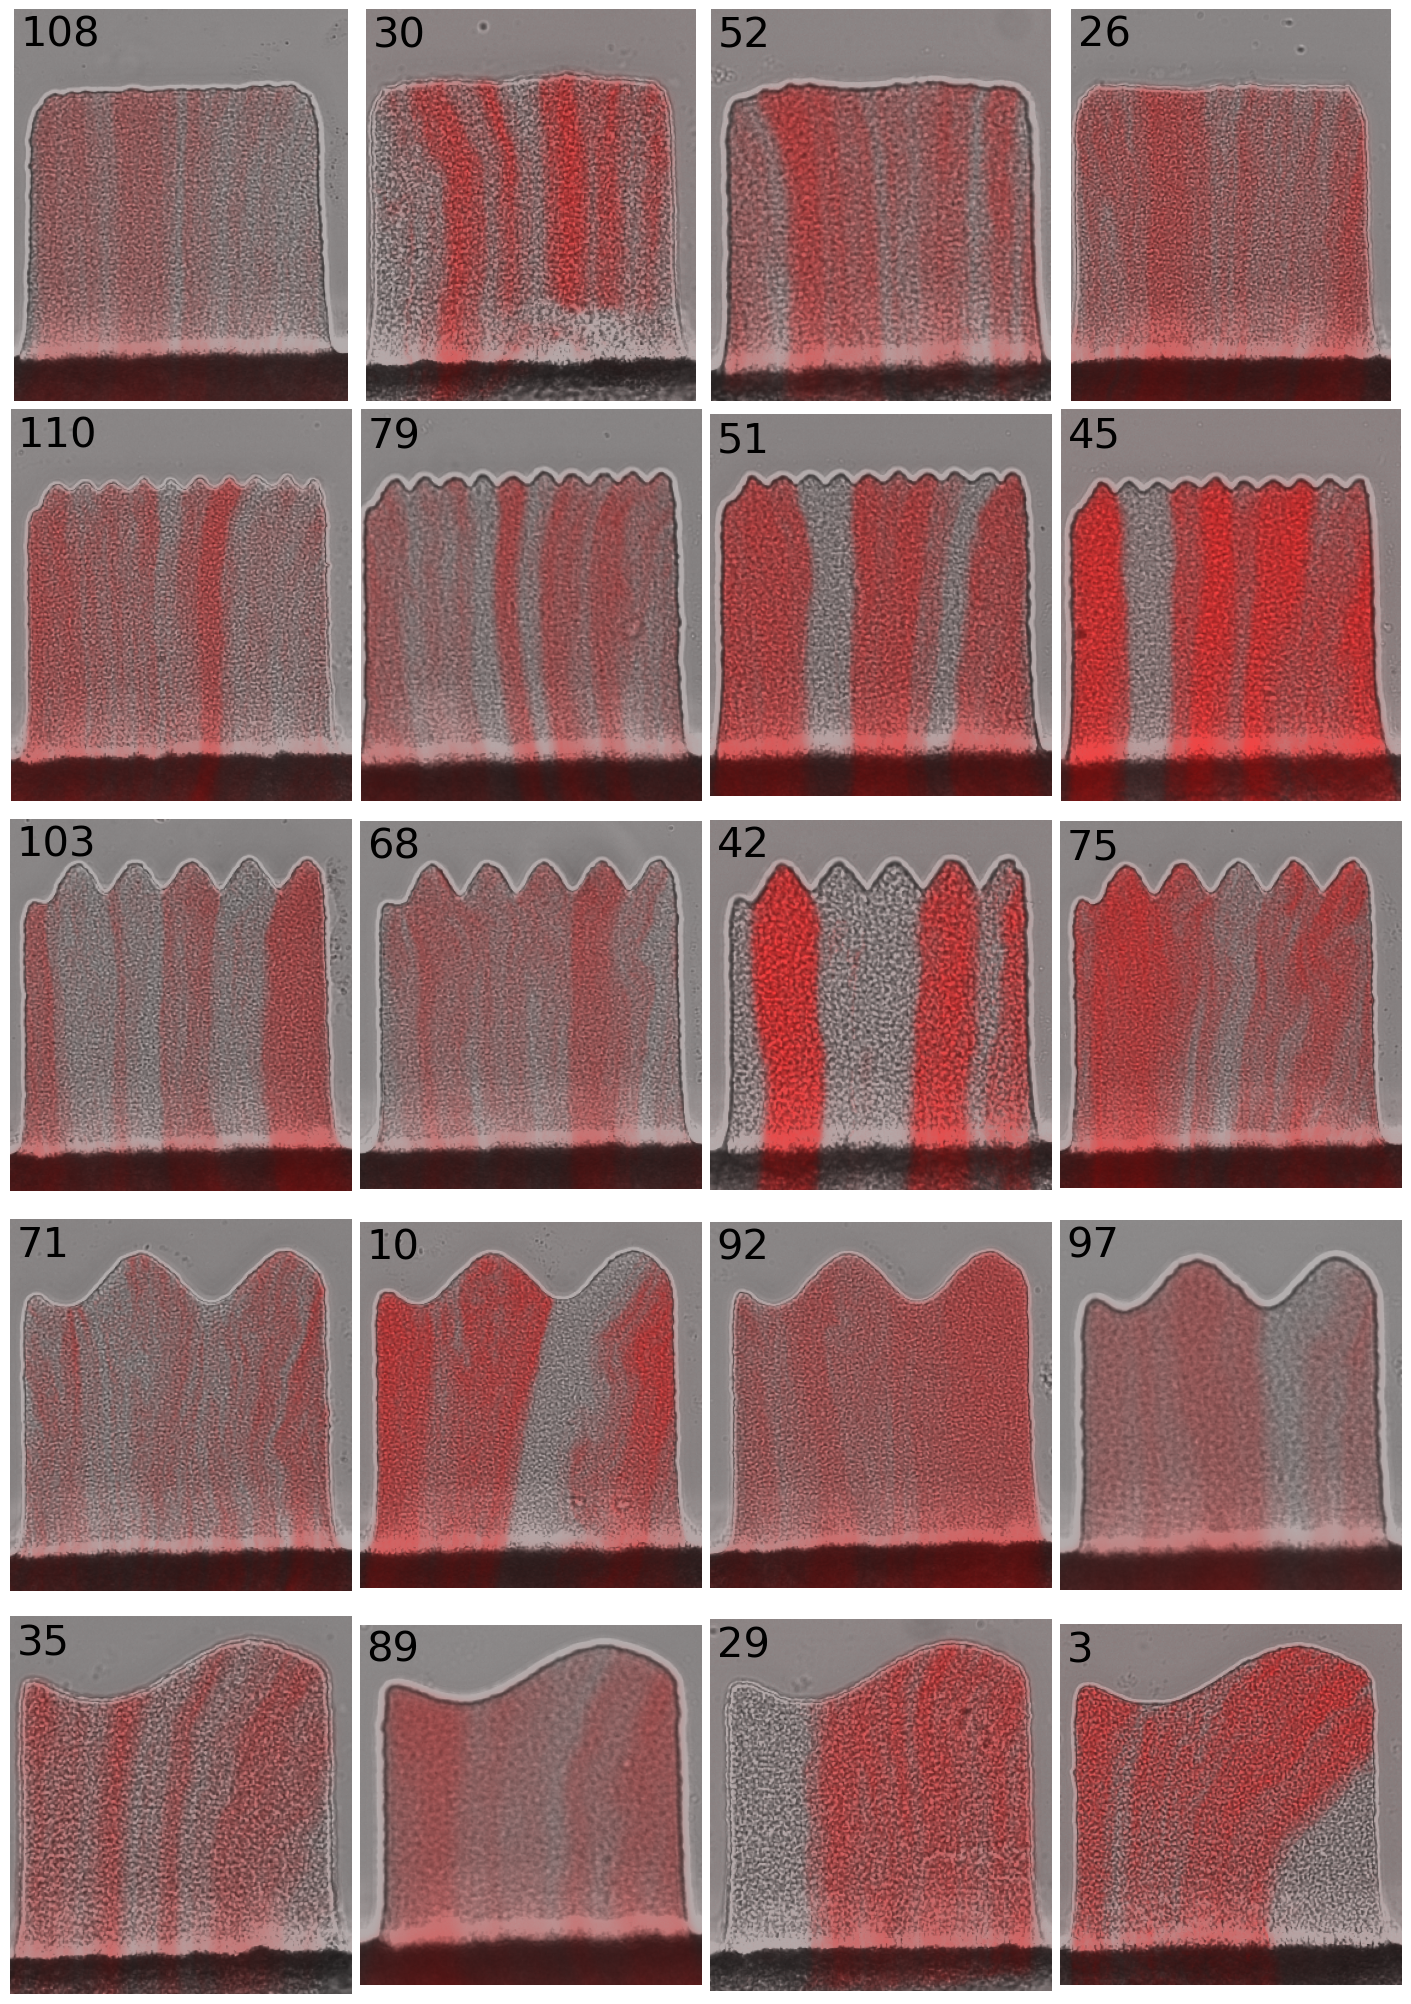

In [13]:
# this creates the actually figure

TA=np.concatenate((flat[[30,  8, 12,  6]],T10A20[[12,  8,  3,  1]],T20A20[[15,  7,  5, 11]],T50A20[[12,  3, 13, 15]],T100A20[[9, 16,  6,  3]]))
n=len(TA)
fig = plt.figure(figsize=(14,4*int((n+3)//4)),constrained_layout=True)
fig.patch.set_facecolor('w')
ax_array = fig.subplots((n+3)//4, 4, squeeze=False)
for i in range(0,n):
    extract_image(int(TA[i,0]),TA[i,1],ax_array[i//4,i%4],flip_if_required=True)
    #extract_image(1,3,ax_array[0, 1])
#fig.tight_layout()
for i in range(0,(n+3)//4):
    for j in range(0,4):
        ax_array[i,j].axis('off')
        ax_array[i,j].text(5,30,str(4*TA[4*i+j,0]+TA[4*i+j,1]),fontsize=30)
plt.show()

## Fig. 1D - Mean sector size versus time

In [14]:
# load the data
divs = np.genfromtxt(currdir+'\\data_Fig_1\\pixel_diversity3v2.csv', delimiter=',', skip_header = 1)
print(divs[-1])
divs2 = np.genfromtxt(currdir+'\\data_Fig_1\\pixel_diversity3v2_continued.csv', delimiter=',', skip_header = 1)
divs2[:,1]=divs2[:,1]+150
print(divs2[-1])
divs=np.concatenate((divs,divs2))

[ 59.         146.           1.           2.           3.
   0.34844545   0.25891341   0.80327869   0.8600506    0.40163934]
[5.90000000e+01 1.99000000e+02 1.00000000e+00 2.00000000e+00
 3.00000000e+00 1.83694921e-02 6.79840582e-03 7.70491803e-01
 9.92923228e-01 9.01639344e-02]


In [26]:
# some pre-processing to rearrange the data. This takes a few minutes
divs2=[]
for pi in range(0,int(divs[-1,0])+1):
    for ni in range(0,4):
        for ti in range(0,int(divs[-1,1])+1):
            sel=np.logical_and(np.logical_and(divs[:,0]==pi,divs[:,4]==ni),divs[:,1]==ti)
            if (sel.any()==True): 
                divs2.append(divs[sel][0])
divs2=np.array(divs2)

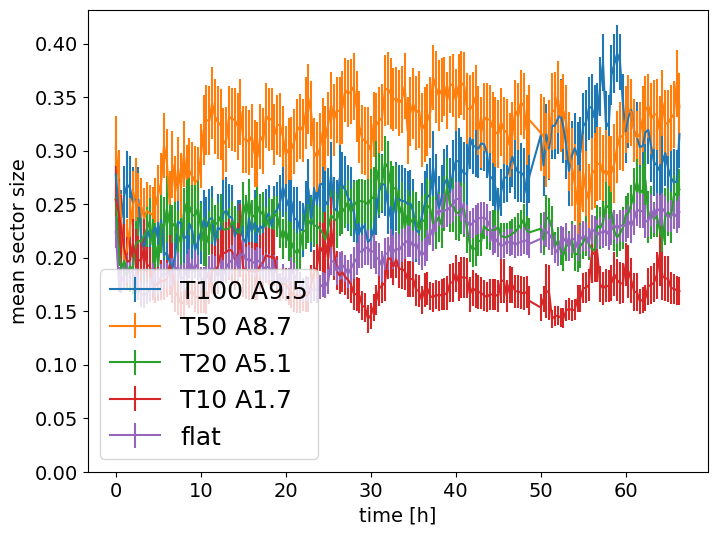

In [30]:
# here we plot a single curve for every well type
plt.rcParams["figure.figsize"] = (8,6)

def plot_av(data,qx=1):
    tmp=np.array(data)
    av=np.mean(tmp[:,:,1],axis=0)
    nsam=len(tmp[:,0,0])
    std=np.std(tmp[:,:,1],axis=0)/np.sqrt(nsam)
    plt.errorbar(tmp[0,:,0]*qx,av,std)

tmp=[]
col=9
for s in T100A20:
    pi=s[0]
    ni=s[1]
    sel=np.logical_and(divs2[:,0]==pi,divs2[:,4]==ni)
    if (sel.any()==True): tmp.append(divs2[sel][:,[1,col]])
plot_av(tmp,qx=20/60.)

tmp=[]
for s in T50A20:
    pi=s[0]
    ni=s[1]
    sel=np.logical_and(divs2[:,0]==pi,divs2[:,4]==ni)
    if (sel.any()==True): tmp.append(divs2[sel][:,[1,col]])
plot_av(tmp,qx=20/60.)

tmp=[]
for s in T20A20:
    pi=s[0]
    ni=s[1]
    sel=np.logical_and(divs2[:,0]==pi,divs2[:,4]==ni)
    if (sel.any()==True): tmp.append(divs2[sel][:,[1,col]])
plot_av(tmp,qx=20/60.)


tmp=[]
for s in T10A20:
    pi=s[0]
    ni=s[1]
    sel=np.logical_and(divs2[:,0]==pi,divs2[:,4]==ni)
    if (sel.any()==True): tmp.append(divs2[sel][:,[1,col]])
plot_av(tmp,qx=20/60.)

tmp=[]
for s in flat:
    pi=s[0]
    ni=s[1]
    sel=np.logical_and(divs2[:,0]==pi,divs2[:,4]==ni)
    if (sel.any()==True): tmp.append(divs2[sel][:,[1,col]])
plot_av(tmp,qx=20/60.)

plt.rcParams['font.size'] = '18'
plt.legend(('T100 A9.5','T50 A8.7','T20 A5.1','T10 A1.7','flat'),loc=3)
plt.xlabel("time [h]"); plt.ylabel("mean sector size")
plt.ylim(bottom=0)
plt.show()

## Fig. 1E - Mean sector size at endpoint

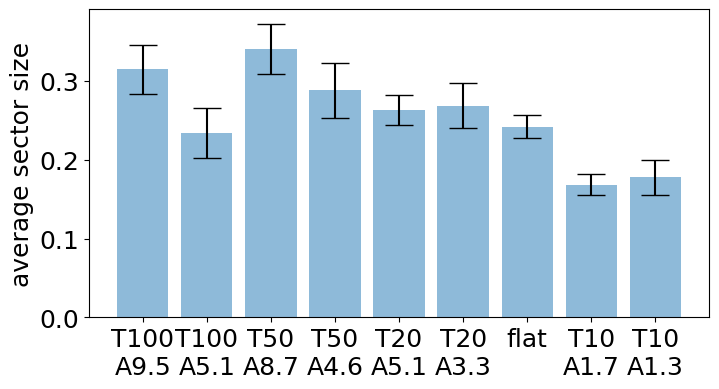

<Figure size 800x400 with 0 Axes>

In [31]:
def avsector(wells):
    col=9
    tmp=[]
    for s in wells:
        pi=s[0]
        ni=s[1]
        sel=np.logical_and(np.logical_and(divs2[:,0]==pi,divs2[:,4]==ni),divs2[:,1]==divs[-1,1]) # last condition is ti=last_ti
        if (sel.any()==True): tmp.append(divs2[sel][:,col][0])
    return np.mean(tmp), np.std(tmp)/np.sqrt(len(tmp))

data=np.array([avsector(T100A20),avsector(T100A10),avsector(T50A20),avsector(T50A10),avsector(T20A20),
               avsector(T20A10),avsector(flat),avsector(T10A20),avsector(T10A10)])
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['font.size'] = '18'
fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
x_pos=[0,1,2,3,4,5,6,7,8]
ax.set_xticks(x_pos)
ax.set_xticklabels(["T100\nA9.5","T100\nA5.1","T50\nA8.7","T50\nA4.6","T20\nA5.1","T20\nA3.3","flat","T10\nA1.7","T10\nA1.3"])
ax.set_ylabel('average sector size')
plt.figure(facecolor='w')
ax.bar(x_pos,data[:,0],yerr=data[:,1],align='center', alpha=0.5, ecolor='black', capsize=10)
plt.show()
plt.rcParams['font.size'] = '14'